🚀 Đang khởi động quá trình so sánh 2 mô hình AI...
🔄 Đang ghép cặp các review trùng nhau...
✅ Tìm thấy 5925 review chung để so sánh.

TIÊU CHÍ             | ĐỘ TRÙNG KHỚP   | SỐ REVIEW LỆCH 
Dai_Ngo              | 86.73%          | 786 dòng
Van_Hoa              | 87.19%          | 759 dòng
Lanh_Dao             | 89.54%          | 620 dòng
Phat_Trien           | 88.49%          | 682 dòng

 Đang vẽ biểu đồ so sánh...


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17680\1108558842.py:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=stats_df, x='Category', y='Agreement', palette='viridis')


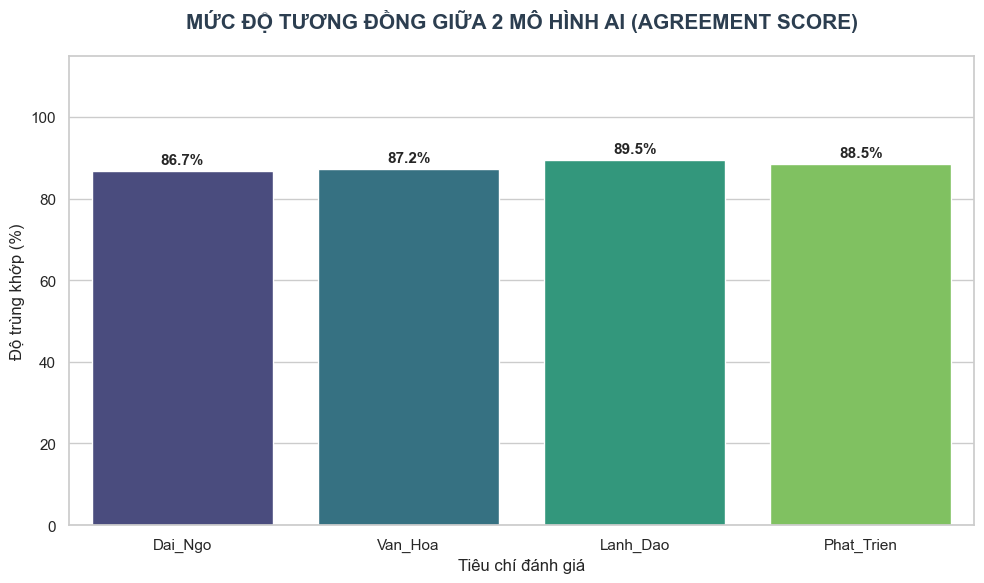


 Đang trích xuất các review khác biệt (Conflict Analysis)...
 Phát hiện 2312 review có đánh giá khác nhau giữa 2 AI.
 Đã lưu chi tiết vào file: AI_Comparison_Diff_Analysis.csv
   (Bạn hãy mở file này để xem AI nào đánh giá đúng hơn)


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# --- 1. CẤU HÌNH TÊN FILE ---
# Lưu ý: Hãy đảm bảo đường dẫn file là chính xác trên máy của bạn
file_model_1 = r"E:\linhtinh\DangHoc\Khai thác dữ liệu\Tech_Job_Radar\Tech_Job_Radar\Tech_Job_Radar\data\processed\MERGED_FINAL_CLEAN.csv"         # Dữ liệu từ AI 1
file_model_2 = r"E:\linhtinh\DangHoc\Khai thác dữ liệu\Tech_Job_Radar\Tech_Job_Radar\Tech_Job_Radar\data\processed\Gemini_MERGED_FINAL_CLEAN.csv"  # Dữ liệu từ AI 2

# --- 2. HÀM ĐỌC DỮ LIỆU ---
def load_data(filepath):
    if not os.path.exists(filepath):
        print(f"❌ Lỗi: Không tìm thấy file '{filepath}'")
        return None
    try:
        # Thử đọc với encoding utf-8-sig (phổ biến cho tiếng Việt)
        return pd.read_csv(filepath, encoding='utf-8-sig')
    except:
        return pd.read_csv(filepath, encoding='utf-8')

print("🚀 Đang khởi động quá trình so sánh 2 mô hình AI...")

# Đọc dữ liệu
df1 = load_data(file_model_1)
df2 = load_data(file_model_2)

if df1 is not None and df2 is not None:
    # Chuẩn hóa tên cột (xóa khoảng trắng thừa nếu có)
    df1.columns = [c.strip() for c in df1.columns]
    df2.columns = [c.strip() for c in df2.columns]

    # --- 3. GHÉP CẶP DỮ LIỆU (QUAN TRỌNG) ---
    print("🔄 Đang ghép cặp các review trùng nhau...")
    merged_df = pd.merge(df1, df2, on='Noi_Dung_Review', how='inner', suffixes=('_M1', '_M2'))
    
    print(f"✅ Tìm thấy {len(merged_df)} review chung để so sánh.")
    
    # --- 4. TÍNH TOÁN ĐỘ TƯƠNG ĐỒNG (CÁCH MỚI - FIX LỖI TYPE ERROR) ---
    categories = ['Dai_Ngo', 'Van_Hoa', 'Lanh_Dao', 'Phat_Trien']
    stats = []

    print("\n" + "="*65)
    print(f"{'TIÊU CHÍ':<20} | {'ĐỘ TRÙNG KHỚP':<15} | {'SỐ REVIEW LỆCH':<15}")
    print("="*65)

    for cat in categories:
        col1 = f"{cat}_M1"
        col2 = f"{cat}_M2"
        
        # --- FIX LỖI Ở ĐÂY ---
        # 1. Fillna("N/A") để xử lý ô trống trước
        # 2. Ép kiểu về string (.astype(str)) để tránh lỗi float vs string
        # 3. Viết thường + xóa khoảng trắng (.str.strip().str.lower())
        s1 = merged_df[col1].fillna("N/A").astype(str).str.strip().str.lower()
        s2 = merged_df[col2].fillna("N/A").astype(str).str.strip().str.lower()
        
        # Dùng Pandas so sánh trực tiếp (Thay vì sklearn accuracy_score) -> An toàn hơn
        matches = (s1 == s2)
        acc = matches.mean()     # Tỷ lệ trùng khớp
        diff_count = (~matches).sum() # Số lượng khác biệt
        
        stats.append({
            'Category': cat,
            'Agreement': acc * 100,
            'Diff_Count': diff_count
        })
        
        print(f"{cat:<20} | {acc*100:.2f}%{' '*9} | {diff_count} dòng")
    print("="*65)

    # --- 5. VẼ BIỂU ĐỒ ---
    print("\n Đang vẽ biểu đồ so sánh...")
    plt.figure(figsize=(10, 6))
    sns.set(style="whitegrid")
    
    stats_df = pd.DataFrame(stats)
    
    # Vẽ biểu đồ cột
    ax = sns.barplot(data=stats_df, x='Category', y='Agreement', palette='viridis')
    
    plt.title('MỨC ĐỘ TƯƠNG ĐỒNG GIỮA 2 MÔ HÌNH AI (AGREEMENT SCORE)', fontsize=15, fontweight='bold', pad=20, color='#2c3e50')
    plt.ylabel('Độ trùng khớp (%)', fontsize=12)
    plt.xlabel('Tiêu chí đánh giá', fontsize=12)
    plt.ylim(0, 115) 
    
    # Hiển thị số % trên đầu cột
    for container in ax.containers:
        ax.bar_label(container, fmt='%.1f%%', padding=3, fontweight='bold', fontsize=11)
        
    plt.tight_layout()
    plt.show() 
    
    # --- 6. XUẤT FILE SỰ KHÁC BIỆT ---
    print("\n Đang trích xuất các review khác biệt (Conflict Analysis)...")
    
    conflict_rows = []
    for index, row in merged_df.iterrows():
        is_diff = False
        row_data = {
            'Ten_Cong_Ty': row.get('Ten_Cong_Ty_M1', 'N/A'),
            'Noi_Dung_Review': row['Noi_Dung_Review']
        }
        
        # Kiểm tra từng tiêu chí (Dùng logic an toàn như trên)
        for cat in categories:
            val1 = str(row[f"{cat}_M1"] if pd.notna(row[f"{cat}_M1"]) else "N/A").strip().lower()
            val2 = str(row[f"{cat}_M2"] if pd.notna(row[f"{cat}_M2"]) else "N/A").strip().lower()
            
            row_data[f"{cat}_Model_1"] = row[f"{cat}_M1"]
            row_data[f"{cat}_Model_2"] = row[f"{cat}_M2"]
            
            if val1 != val2:
                is_diff = True
        
        if is_diff:
            conflict_rows.append(row_data)
            
    # Lưu file nếu có sự khác biệt
    if conflict_rows:
        diff_df = pd.DataFrame(conflict_rows)
        output_filename = 'AI_Comparison_Diff_Analysis.csv'
        diff_df.to_csv(output_filename, index=False, encoding='utf-8-sig')
        
        print(f" Phát hiện {len(diff_df)} review có đánh giá khác nhau giữa 2 AI.")
        print(f" Đã lưu chi tiết vào file: {output_filename}")
        print("   (Bạn hãy mở file này để xem AI nào đánh giá đúng hơn)")
    else:
        print(" Hai mô hình AI giống nhau hoàn toàn (100%)!")

else:
    print(" Không thể chạy so sánh do thiếu dữ liệu đầu vào.")